In [1]:
#essential libraries
#working with maca v2 climate data with python
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4
#import geopandas as gdp
import cartopy.crs as ccrs
#import earthpy as et
import numpy
import rioxarray as rxr
#import cartopy.feature as cfeature
import seaborn as sns
from typing import Optional
import pathlib
import os



#plot options
sns.set(font_scale=1.3)
sns.set_style('white')
print("\u2705 Good to go Gabby")

relative_path= "Data_cell"
def set_directory(path):
    """
    Sets the current working directory to the specific path.

    Args:
    path: The path to the directory
    """
    home_dir = pathlib.Path.home()
    absolute_path = os.path.join(home_dir,path)
    
    try:
        os.chdir(absolute_path)
        print(f"Successful changed directory to: {os.getcwd()}")
    except FileNotFoundError:
        print(f"Error:Directory not found:{absolute_path}")
    except PermissionError:
        print(f"Error:Permission denied to access:{absolute_path}")
    except OSError as e:
       print(f"An OS error occurred:{e}")
        

###further assignement
#os.chdir(os.path.join(et.io.HOME))
#set_directory("./Downloads/Data_cell/agg_macav2metdata_tasmin_bcc-csm_historical_1950_2005_CONUS_monthly.nc")

set_directory(relative_path)


✅ Good to go Gabby
Successful changed directory to: /home/gabriel/Data_cell


In [2]:
#function to selct and verify netcdf4 data

def select_netcdf(
    filepath: str,
    variable: str,
    level: Optional[int] = None,
    max_steps:Optional[int] = None
) -> xr.Dataset:
    """
    Returns:
     xr.Dataset: selected data as an xarray dataset
     """

   
    try:
     data = xr.open_dataset(filepath)
     data = data['air_temperature']
     print("\u2705 File found and sucessfully accessed")

     if "batch" in data.dims:
        data = data.isel(batch=0)

     if max_steps is not None and "time" in data.sizes and max_steps < data.size["time"]:
        data = data.sel(time(range(0,max_steps)))
        

    except FileNotFoundError:
      print(f"Error:File '{filepath}' not found.")
      return None
  
    except KeyError as e:
     print(f"Error:kKey error - {e}.Check variable or dimensions")
    
   

    #data verification
    select_netcdf("agg_macav2metdata_tasmin_bcc-csm_historical_1950_2005_CONUS_monthly.nc","air-temperature")



In [3]:
model_name = ('bcc-csm1-1',
              'bcc-csm1-1-m',
              'BNU-ESM',
              'CanESM2',
              'CCSM4',
              'CNRM-CM5',
              'CSIRO-Mk3-6-0',
              'GFDL-ESM2G',
              'GFDL-ESM2M',
              'HadGEM2-CC365',
              'HadGEM2-ES365',
              'inmcm4',
              'IPSL-CM5A-MR',
              'IPSL-CM5A-LR',
              'IPSL-CM5B-LR',
              'MIROC5',
              'MIROC-ESM',
              'MIROC-ESM-CHEM',
              'MRI-CGCM3',
              'NorESM1-M')

dir_path = 'http://thredds.northwestknowledge.net:8080/thredds/dodsC/'
variable_name = ('tasmax',
                 'tasmin',
                 'rhsmax',
                 'rhsmin',
                 'pr',
                 'rsds',
                 'uas',
                 'vas',
                 'huss')
var_long_name = ('air_temperature',
                 'air_temperature',
                 'relative_humidity',
                 'relative_humidity',
                 'precipitation',
                 'surface_downwelling_shortwave_flux_in_air',
                 'eastward_wind',
                 'northward_wind',
                 'specific_humidity')
scenario_type = ('historical','rcp45','rcp85')

year_start = ('1950')
year_end = ('2005')
run_num = [1] * 20
run_num[4] = 6  # setting CCSM4 with run 6
domain = 'CONUS'
model = 2
var=1
scenario=0


try:
    print("Great! You have selected :\n \u2705 variable {}  \n \u2705 Model: {}, \n \u2705 Scenario {}".format(variable_name[var],model_name[model],scenario_type[scenario]))

except IndexError as e:
    raise IndexError("Oops, it looks like you selected value that is "
                     "not within the range of values which is 0-2. please look"
                     "closely at your selected values.")
min_temp_xr = xr.open_dataset("agg_macav2metdata_tasmin_bcc-csm_historical_1950_2005_CONUS_monthly.nc")


Great! You have selected :
 ✅ variable tasmin  
 ✅ Model: BNU-ESM, 
 ✅ Scenario historical


In [4]:
min_temp_xr = xr.open_dataset("agg_macav2metdata_tasmin_bcc-csm_historical_1950_2005_CONUS_monthly.nc")
#grabbibg the coordinate system
climate_crs = min_temp_xr.rio.crs
print(climate_crs)
min_temp_xr

None


<xarray.Dataset> Size: 6MB
Dimensions:          (time: 672, lat: 49, lon: 49)
Coordinates:
  * time             (time) object 5kB 1950-01-15 00:00:00 ... 2005-12-15 00:...
  * lat              (lat) float64 392B 39.98 40.02 40.06 ... 41.9 41.94 41.98
  * lon              (lon) float64 392B 240.0 240.1 240.1 ... 241.9 242.0 242.0
Data variables:
    air_temperature  (time, lat, lon) float32 6MB ...
Attributes: (12/48)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    publisher_email:                 reacch@uidaho.edu
    publisher_url:                   http://www.reacchpna.org/
    license:                         Creative Commons CC0 1.0 Universal Dedic...
    coordinate_system:               WGS84,EPSG:4326
    Conventions:                     CF-1.0
    History:                         Translated to CF-1.0 Conventions by Netc...

In [5]:
#view the first values
min_temp_xr["air_temperature"]["lat"].values[:5]

#print min/max values
print("the min/maxi lattitude values are:",min_temp_xr["air_temperature"]["lat"].values.min(),min_temp_xr["air_temperature"]["lat"].values.max())
print("the min/maxi longitude values are:",min_temp_xr["air_temperature"]["lon"].values.min(),min_temp_xr["air_temperature"]["lon"].values.max())


the min/maxi lattitude values are: 39.97950744628906 41.97947311401367
the min/maxi longitude values are: 240.01942443847656 242.01939392089844


In [6]:
#data range
print("the earliest date in data",min_temp_xr["time"].min())
print("latest date in data:",min_temp_xr["time"].max())

the earliest date in data <xarray.DataArray 'time' ()> Size: 8B
array(cftime.DatetimeNoLeap(1950, 1, 15, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
latest date in data: <xarray.DataArray 'time' ()> Size: 8B
array(cftime.DatetimeNoLeap(2005, 12, 15, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)


In [7]:
print("data shape",min_temp_xr["air_temperature"].values)

data shape [[[267.70737 268.00195 268.18445 ... 267.81525 267.24918 268.01385]
  [267.94656 268.0431  268.3592  ... 267.55374 267.596   266.9716 ]
  [268.1379  268.21503 268.25357 ... 266.07193 266.4895  267.56265]
  ...
  [266.71518 266.47928 266.0432  ... 267.2724  267.54135 266.7021 ]
  [266.7166  266.44012 265.98636 ... 267.29697 267.67737 267.2791 ]
  [266.875   266.4959  265.46814 ... 266.12152 266.62155 266.90363]]

 [[265.54794 265.87012 266.062   ... 267.3116  266.25967 266.97   ]
  [265.52426 266.35556 266.50436 ... 267.3402  266.951   265.88254]
  [266.6348  266.6118  266.6601  ... 265.88312 266.31598 267.36386]
  ...
  [262.15298 261.6874  261.35568 ... 265.1115  265.4516  264.35892]
  [262.15067 261.7519  261.4717  ... 265.16016 265.59598 265.16876]
  [262.5149  262.10037 261.2161  ... 263.94464 264.44785 264.7925 ]]

 [[268.95996 269.64395 269.86575 ... 270.11438 268.74936 269.8491 ]
  [267.67636 269.6196  269.63202 ... 270.2687  269.8006  268.5561 ]
  [270.134   270.1472

In [8]:
#metadata
metadata = min_temp_xr.attrs
print(metadata["title"])


Monthly aggregation of downscaled daily meteorological data of Monthly Average of Daily Minimum Near-Surface Air Temperature from Beijing Climate Center, China Meteorological Administration (bcc-csm1-1) using the run r1i1p1 of the historical scenario.


In [9]:
key=40
latitude = min_temp_xr["air_temperature"]["lat"].values[key]
longitude = min_temp_xr["air_temperature"]["lon"].values[key]
print( "the latitude {},the longitude {}:".format(latitude,longitude))


the latitude 41.646148681640625,the longitude 241.68606567382812:


In [10]:
#subsetting data
one_point = min_temp_xr["air_temperature"].sel(lat=latitude,lon=longitude)
print(one_point.shape)

(672,)


[Text(0.5, 1.0, 'Time series for a Single lat/lon')]

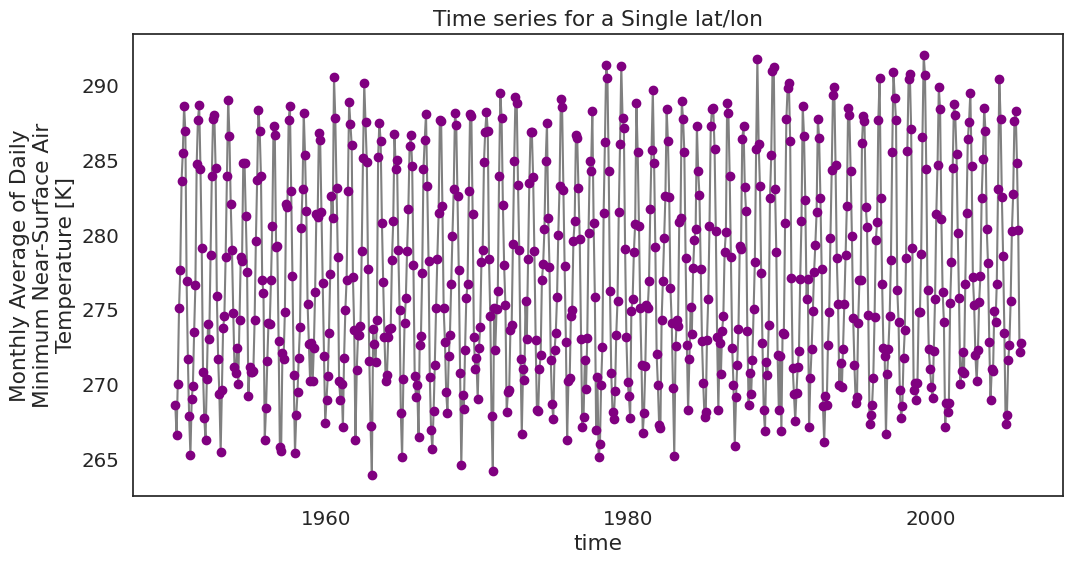

In [11]:
f,ax = plt.subplots(figsize=(12,6))
one_point.plot.line(hue='lat',marker='o',ax=ax,color="grey",markerfacecolor="purple",markeredgecolor="purple")
ax.set(title="Time series for a Single lat/lon")

In [12]:
#convering time series data to dataframe
one_point_df = one_point.to_dataframe()
one_point_df.head()

,lat,lon,air_temperature
time,,,
1950-01-15 00:00:00,41.646149,241.686066,268.620636
1950-02-15 00:00:00,41.646149,241.686066,266.600403
1950-03-15 00:00:00,41.646149,241.686066,270.029327
1950-04-15 00:00:00,41.646149,241.686066,275.095886
1950-05-15 00:00:00,41.646149,241.686066,277.687805


In [13]:
#to csv
one_point_df.to_csv('one-location.csv')

In [14]:
#temporal and spatial subsetting of data
start_date = "2001-01-01"
end_date = "2005-01-01"
temp_2000_2005 = min_temp_xr["air_temperature"].sel(time=slice(start_date,end_date),lat=latitude,lon=longitude)
temp_2000_2005.values

array([268.73895, 268.17752, 268.78067, 275.44388, 278.17944, 284.47937,
       288.79544, 288.0633 , 285.4518 , 280.16394, 275.79453, 270.0595 ,
       270.88678, 272.19077, 270.77356, 276.75873, 281.48215, 286.42926,
       287.60635, 289.52426, 284.61557, 277.17282, 275.3354 , 271.98245,
       270.2021 , 272.3192 , 275.5228 , 277.25726, 282.4701 , 285.12802,
       288.51755, 287.00452, 280.41614, 278.13342, 272.86194, 268.9774 ,
       271.04623, 270.9285 , 274.94305, 274.16962, 276.72382, 283.07455,
       290.4569 , 287.78604, 282.5579 , 278.6237 , 273.4663 , 267.32462],
      dtype=float32)

In [15]:
#slicing of data
sliced_2000_01_01_2005_01_01_241_41_data = temp_2000_2005.to_dataframe()
sliced_2000_01_01_2005_01_01_241_41_data.to_csv("sliced_2000_01_01_2005_01_01_241_41_data.csv")

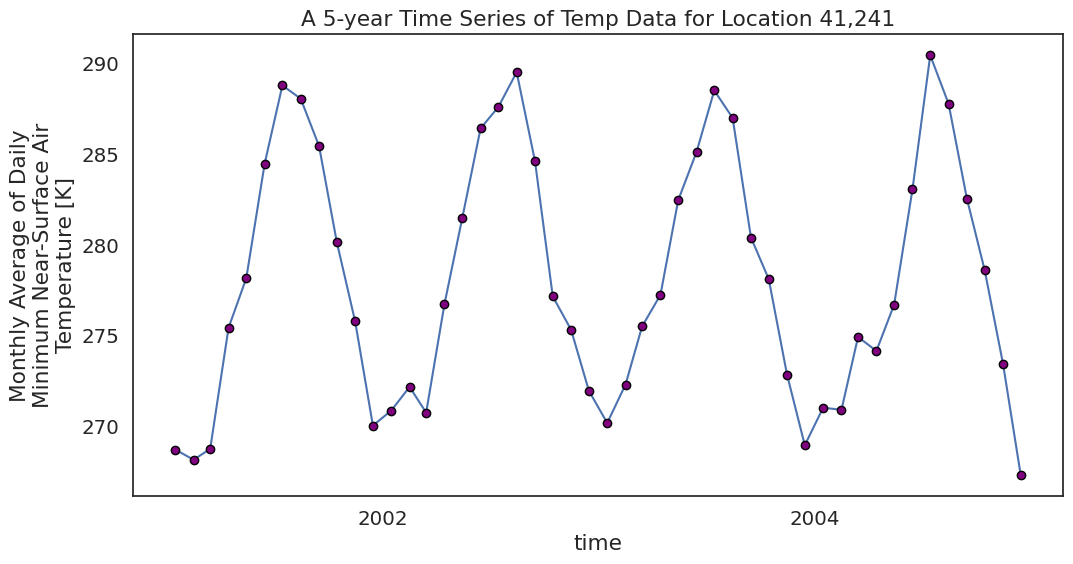

In [16]:
#slice data ploting
f,ax = plt.subplots(figsize=(12,6))
temp_2000_2005.plot.line(hue='lat',marker='o',ax=ax,markerfacecolor="purple",markeredgecolor="black")
ax.set(title="A 5-year Time Series of Temp Data for Location 41,241")
plt.show()

In [17]:
#slicing across a specific extent for aspecific time
start_date="1950-01-15"
end_date="1951-01-15"

bcc_csm = min_temp_xr["air_temperature"].sel(time=slice(start_date,end_date))
#plotting
#f,ax = plt.subplots(figsize = (12,6))

#saving data
start_date = "1950-01-15"
end_date= "1950-01-18"

file_name = "monthly-temp"+ start_date+"-"+end_date+".csv"
file_name
#bcc_csm.to_dataframe().to_csv(file_name)


'monthly-temp1950-01-15-1950-01-18.csv'

(array([1444., 5593., 5474., 2916., 3536., 2799., 1716., 4343., 2968.,
         424.]),
 array([260.14804077, 263.17755127, 266.20706177, 269.23657227,
        272.26608276, 275.29559326, 278.32513428, 281.35464478,
        284.38415527, 287.41366577, 290.44317627]),
 <BarContainer object of 10 artists>)

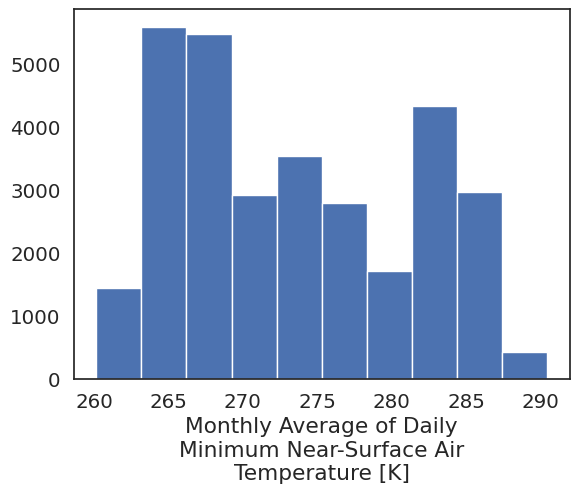

In [18]:
bcc_csm.plot()

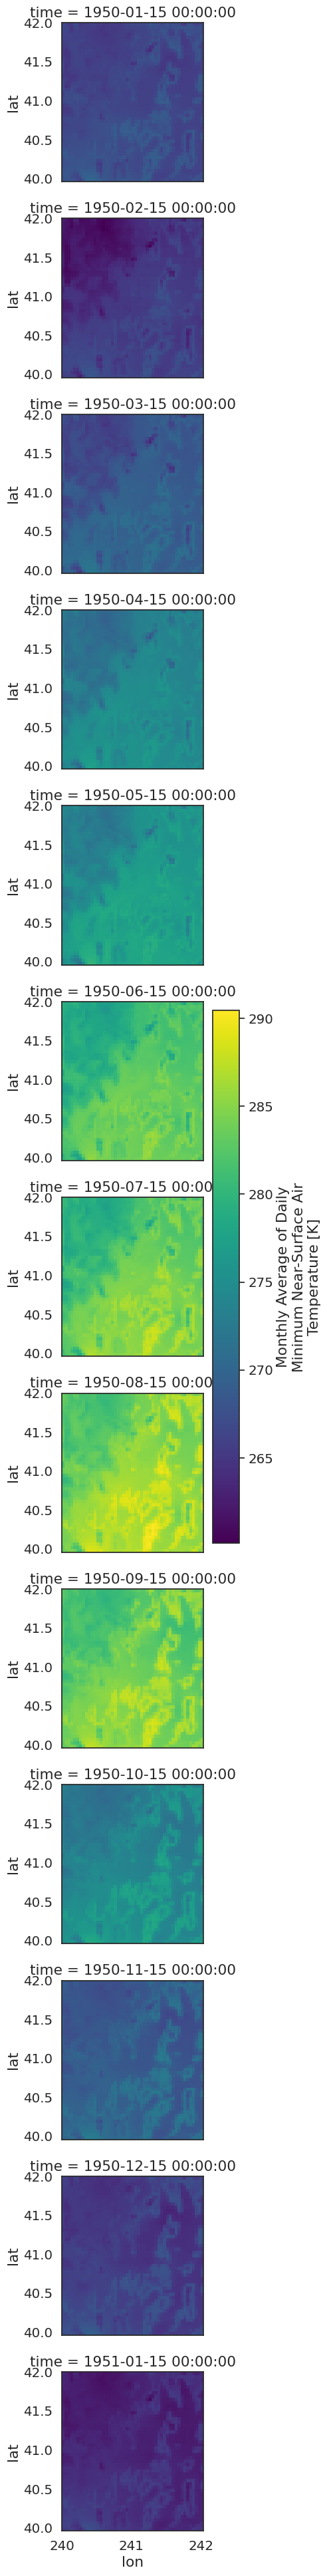

In [19]:
#spatial raster plots
#One month time steps
bcc_csm.plot(x="lon",y="lat",col="time",col_wrap=1)
plt.show()

In [20]:
central_lat = 37.5
central_long = 96
extend = [-120,-70,20,55.5] #conus

maj_proj = ccrs.AlbersEqualArea(central_longitude=central_lon,central_latitude=central_lat) 
aspect = bcc_csm.shape[2] / bcc_csm[1]

p = bcc_csm.plot(transform=ccrs,PLateCarree(),col='time',col_wrap=1,aspect=aspect,figsize=(10,10),subplot_kws={'projection' : map_proj})

plt.subtitles("Two Time Steps of CONUS")

SyntaxError: positional argument follows keyword argument (559008001.py, line 8)